TODO:
- different CV-splits
- Model Selection (Features and model)
- EDA-PLots
- SMOTE

# Imports

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV


In [53]:
df = pd.read_csv('Data/heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


# EDA

# Preprocessing

In [54]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

df['Sex']=le.fit_transform(df['Sex'])
df['RestingECG']=le.fit_transform(df['RestingECG'])
df['ChestPainType']=le.fit_transform(df['ChestPainType'])
df['ExerciseAngina']=le.fit_transform(df['ExerciseAngina'])
df['ST_Slope']=le.fit_transform(df['ST_Slope'])

df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


# Model 

In [57]:
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [56]:
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import cross_val_score

classifiers = [
    AdaBoostClassifier(n_estimators=500, learning_rate=0.01),
    SVC(),
    GradientBoostingClassifier(n_estimators=500, learning_rate=0.01, random_state=0),
    RandomForestClassifier(),
    ExtraTreesClassifier()
]

for classifier in classifiers:
    score = cross_val_score(classifier, X, y, cv=5).mean()
    print("{0} Model Accuracy: {1} %".format(str(classifier), (str(round(score, 3) * 100))))

AdaBoostClassifier(learning_rate=0.01, n_estimators=500) Model Accuracy: 82.8 %
SVC() Model Accuracy: 68.4 %
GradientBoostingClassifier(learning_rate=0.01, n_estimators=500, random_state=0) Model Accuracy: 82.6 %
RandomForestClassifier() Model Accuracy: 82.6 %
ExtraTreesClassifier() Model Accuracy: 81.8 %


## Random forest hyperparameter tuning

In [60]:
model = ExtraTreesClassifier(n_estimators=100, min_samples_split=25, min_samples_leaf=35)
                            
gsc = GridSearchCV(
    estimator=model,
    param_grid={
        'n_estimators': [50, 126, 25],
        'max_features': [5, 7, 11],
        'min_samples_leaf': [20, 50],
        'min_samples_split': [15, 36],
    },
    scoring='accuracy',
    cv=5
)

grid_result = gsc.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.850407 using {'max_features': 5, 'min_samples_leaf': 20, 'min_samples_split': 15, 'n_estimators': 50}


In [67]:
# fit "best" model
model = ExtraTreesClassifier(**grid_result.best_params_)
model.fit(X_train, y_train)

# save predictions in dataframe
df_prediction = pd.DataFrame({'y_true': y_test.tolist(), 'y_pred': model.predict(X_test)})

## Neural Network

In [36]:
import tensorflow as tf

In [38]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# standardization
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

In [49]:
# model build
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(2, activation=tf.nn.softmax))

model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

model.fit(X_train, y_train, epochs=3)

Epoch 1/3
20/20 [==============================] - 1s 5ms/step - loss: 0.6799 - accuracy: 0.5122
Epoch 2/3
20/20 [==============================] - 0s 3ms/step - loss: 0.6358 - accuracy: 0.6455
Epoch 3/3
20/20 [==============================] - 0s 3ms/step - loss: 0.6079 - accuracy: 0.6569


In [50]:
val_loss, val_acc = model.evaluate(X_test, y_test)
print('Loss:', round(val_loss, 3), 'Accuracy:', str(round(val_acc, 3) * 100 )+'%')

10/10 [==============================] - 0s 2ms/step - loss: 0.5615 - accuracy: 0.6766
Loss: 0.561 Accuracy: 67.7%


# Neural Nets Number Recognition

In [27]:
# IMPORT DATA
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)


Shape of X_train: (10000, 28, 28)
Sample is a: 5


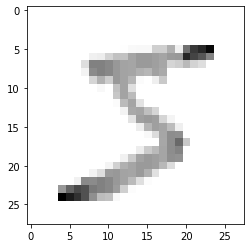

In [31]:
print('Shape of X_train:', x_test.shape)
print('Sample is a:', y_train[0])
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

In [32]:
# MODEL
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))  # softmax for probabilty distribution


model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 8s 3ms/step - loss: 0.2665 - accuracy: 0.9216
Epoch 2/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1112 - accuracy: 0.9657
Epoch 3/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0755 - accuracy: 0.9761


In [34]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print('Loss:', val_loss, 'Accuracy:', val_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.0827 - accuracy: 0.9737
Loss: 0.08267320692539215 Accuracy: 0.9736999869346619
